# List Comprehensions and Generators

Credits:
- https://towardsdatascience.com/python-basics-list-comprehensions-631278f22c40

## List Comprehensions

### What are List Comprehensions?

List comprehensions provide us with a simple way to create a list based on some iterable. During the creation, elements from the iterable can be conditionally included in the new list and transformed as needed.

An iterable is something you can loop over. If you want a more detailed explanation you can read this [blog post](https://towardsdatascience.com/python-basics-iteration-and-looping-6ca63b30835c).

### Basic List Comprehension syntax
The components of a list comprehension are:

- Output Expression (Optional)
- Iterable
- Iterator variable which represents the members of the iterable
    
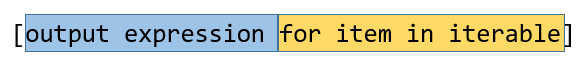

Examples Basic List Comprehensions:

In [ ]:
# Write even numbers
evens1 = [2*i for i in range(10)]
print(evens1)

In [ ]:
# Find the squares of the numbers in a list
numbers = [1, 2, 3, 4, 5]
squares = [number**2 for number in numbers]
print(squares)

### Boolean testing List Comprehension 
We can also create more advanced list comprehensions which include a conditional statement on the iterable.

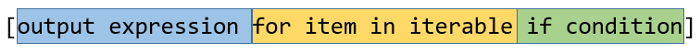

Example List Comprehensions with conditional clause:

In [ ]:
# Output odd numbers
odds = [i for i in range(20) if i%2==1]
odds

Here `i%2` is the remainder when i is divided by 2, so that `i%2==1` is `True` if the number is odd. Even though this is a relative new addition to the language, it is now fairly common since it's so convenient.

In [ ]:
# Find the square of the numbers biguer than two in a list 
numbers = [1, 2, 3, 4, 5]
squares = [number**2 for number in numbers if number > 2]
print(squares)

### List Comprehensions vs loops

The list comprehensions are more efficient both computationally and in terms of coding space and time than a for loop. Typically, they are written in a single line of code.

Let’s see how much more space we’ll need to get the same result from the last example using a for loop.

In [ ]:
numbers = [1, 2, 3, 4, 5]
squares = []
for number in numbers:
    if number > 2:
        squares.append(number**2)
print(squares)

In [ ]:
numbers = [1, 2, 3, 4, 5]
squares = [number**2 for number in numbers if number > 2]
print(squares)

We can clearly see that the list comprehension above was much easier to write. However, keep in mind that:

<div class="alert alert-info">  Every list comprehension can be rewritten as a for loop, but not every for loop can be rewritten as a list comprehension.

What about the computational speed? We can use the timeit library to compare the speed of a for loop vs the speed of a list comprehension.

In [ ]:
%%timeit
numbers = range(100)
squares = []
for number in numbers:
    if number > 2:
        squares.append(number**2)

In [ ]:
%%timeit
# Find the square of the numbers biguer than two in a list 
numbers = range(100)
squares = [number**2 for number in numbers if number > 2]

<div class="alert alert-info">  List Comprehensions are usually faster too.

 We can also pass the number of executions using the number argument. We’ll set this argument to 1 million.Let's time them:

In [ ]:
import timeit

def squares(size):
    result = []
    for number in range(size):
        result.append(number*number)
    return result

def squares_comprehension(size):
    return [number*number for number in range(size)]

print(timeit.timeit("squares(50)", "from __main__ import squares", number = 1_000_000))
print(timeit.timeit("squares_comprehension(50)", "from __main__ import squares_comprehension", number = 1_000_000))

Results may differ between machines. However, the list comprehension implementation will be faster in all cases.

### List Comprehensions vs map and filter

List comprehensions are a concise notation borrowed from the functional programming language Haskell. We can think of them like a syntactic sugar for the filter and map functions.

We have seen that list comprehensions can be a good alternative to for loops because they are more compact and faster.

**Lambda Functions**

Lambda functions are small anonymous functions. They can have any number of arguments but can have only one expression.

Mostly, the lambda functions are passed as parameters to functions which expect a function object as one of their parameters like map and filter.

**Map Function**

The map function returns an iterator that applies a function to every item of iterable, yielding the results. Let’s compare it with a list comprehension.

In [ ]:
# Map
numbers = [1, 2, 3, 4, 5]
squares = list(map(lambda x: x**2, numbers))
print(squares)

# List Comprehension
numbers = [1, 2, 3, 4, 5]
squares = [number**2 for number in numbers]
print(squares)

**Filter Function**

The filter function constructs an iterator from elements of iterable for which the passed function returns true. Again, let’s compare the filter function versus the list comprehensions.

In [ ]:
# Filter
numbers = [1, 2, 3, 4, 5]
filtered = list(filter(lambda x: x % 2 == 0, numbers))
print(filtered)

# List Comprehension
numbers = [1, 2, 3, 4, 5]
filtered = [number for number in numbers if number % 2 == 0]
print(filtered)

### More Complex List Comprehensions

Additionally, when we’re creating a list comprehension we can have many conditional statements on the iterable.
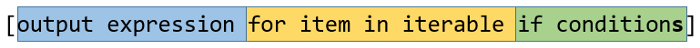

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 18, 20]
squares = [number for number in numbers if number % 2 == 0 if number % 3 == 0]
print(squares)

### `if-else` clause in List Comprehensions

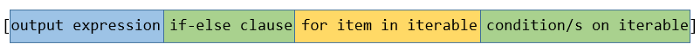

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 18, 20]
squares = ["small" if number < 10 else "big" for number in numbers if number % 2 == 0 if number % 3 == 0]
print(squares)

We are using here the ternary operator for `if-else` statemet.

### Readability

We can see that some list comprehensions can be very complex and it’s hard to read them. Python allows line breaks between brackets and braces. We can use this to make our complex comprehension more readable.

For example, we can our last transform example to this:

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 18, 20]
squares = [
    "small" if number < 10 else "big" 
    for number in numbers 
    if number % 2 == 0 
    if number % 3 == 0]
print(squares)

### Nested For Loops

In some cases, we need nested `for` loops to complete some task. In this cases, we can also use a list comprehension to achieve the same result.

Imagine that we have a matrix and we want to flatten it. We can do this easily with two `for` loops like this:

In [ ]:
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

flattened = []
for row in matrix:
    for item in row:
        flattened.append(item)
        
print(flattened)

We can achieve the same result using a list comprehension.
*Tip: the order of the for clauses remain the same as in the original for loops.*

In [ ]:
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
flattened = [item for row in matrix for item in row]   
print(flattened)b`

Let's time it again:

In [ ]:
def flatten(matrix):
    flattened = []
    for row in matrix:
        for item in row:
            flattened.append(item)
    return flattened

def flatten_comprehension(matrix):
    return [item for row in matrix for item in row] 

print(timeit.timeit("flatten([[1, 2, 3], [4, 5, 6], [7, 8, 9]])", "from __main__ import flatten", number = 1_000_000))
print(timeit.timeit("flatten_comprehension([[1, 2, 3], [4, 5, 6], [7, 8, 9]])", "from __main__ import flatten_comprehension", number = 1_000_000))

### Nested List Comprehensions

In other cases, we may need to create a matrix. We can do that with nested list comprehensions. This sound a little bit crazy, but the concept is simple.

One list comprehension returns a list, right? So, if we place a list comprehension in the output expression of another list comprehension, we’ll get a matrix as result.

In [ ]:
matrix = [[item for item in range(5)] for row in range(3)]
print(matrix)

## Other Comprehensions

In Python, we have also dictionary comprehensions and set comprehensions. All the principles we saw are the same for these comprehensions, too. We just have to know some very little details to create a dictionary or set comprehensions.

### Dictionary Comprehensions

To create a dictionary comprehension we just need to change the brackets `[]` to curly braces `{}`. Additionally, in the output expression, we need to separate key and value by a colon :

In [ ]:
prices = {"beer": 2, "fish": 5, "apple": 1}
float_prices = {key:float(value) for key, value in prices.items()}
print(float_prices)

### Set Comprehensions

To create a set comprehension we only need to change the brackets `[]` to curly braces `{}`.

In [ ]:
numbers = [10, 10, 20, 30, 12, -20, 0, 1]
unique_squares = {number**2 for number in numbers}
print(unique_squares)

## Generator expressions

Here, I just want to mention that Python also has something called generator expressions. They are very similar to the list comprehensions. The difference is that they use round brackets `()`. Also, they don’t store the list in memory. They use the lazy evaluation technique.

<div class="alert alert-info"> List comprehensions aren’t useful if you’re working with iterators that return an infinite stream or a very large amount of data. Generator expressions are preferable in these situations.

In [ ]:
# Write even numbers
evens1 = (2*i for i in range(10))
print(evens1)

for number in evens1:
    print(number)

## Iterators / Generators

**iterators** are a way of making virtual sequence objects. Consider if we had the nested loop structure:

    for i in list(range(1000000)):
        for j in list(range(1000000)):

Inside the main loop, we make a list of 1,000,000 integers, just to loop over them one at a time. We don't need any of the additional things that a lists gives us, like slicing or random access, we just need to go through the numbers one at a time. And we're making 1,000,000 of them. 

**iterators** are a way around this. For example, the **range** function itself is an iterator. This simply makes a counter that is looped through in sequence, so that the analogous loop structure would look like:

    for i in range(1000000):
        for j in range(1000000):

This improvement in python 3 dramatically speeds up the code, because we're not making 1,000,000 big lists.

We can define our own iterators using the **yield** statement:

In [ ]:
def evens_below(n):
    for i in range(n):
        if i%2 == 0:
            yield i
    return

for i in evens_below(9):
    print(i)

We can always turn an iterator into a list using the **list** command:

In [ ]:
list(evens_below(9))

There's a special syntax called a **generator expression** that looks a lot like a list comprehension:

In [ ]:
evens_gen = (i for i in range(9) if i%2==0)
for i in evens_gen:
    print(i)

## Summary

- List comprehensions provide us with a simple way to create a list based on some iterable.
- The comprehensions are more efficient than using a for a loop.
- We can use conditional statements in the comprehensions.
- Comprehensions are a good alternative to the built-in map and filter functions.
- We can have nested comprehensions.
- In Python, we have also dictionary comprehensions and set comprehensions.
- Generator expressions are preferable when we work with an infinite stream of a very large amount of data.